# Time to Classify

### Upload the "People" folder into your google drive!

##### Mount your drive

In [1]:
from google.colab import drive

# < Your code goes here >

Mounted at /content/gdrive/


In [2]:
# !ls

##### Change your directory to "gdrive/MyDrive"

In [3]:
import os

# < Your code goes here >

/content/gdrive/MyDrive


##### Import the required staff

In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

##### Create variables "height" and "width", for the mean height and mean width of all the pics you have in your 4 subdirectories

In [6]:
dir_names = 'People/Men/', 'People/Women/', 'People/Boys/', 'People/Girls/'

def height_width_mean(dir_names = dir_names):
    # < Your code goes here >   
    
    return np.array(height).mean(), np.array(width).mean()

In [ ]:
height, width = height_width_mean()

In [ ]:
height, width

(834.0095198675497, 695.4511589403974)

##### Create a pathlib.Path object for the "People" directory.

In [9]:
import pathlib

    # < Your code goes here >   


In [10]:
image_count = len(list(data_dir.glob('*/*.*')))
print(image_count)

4830


##### Choose a batch_size for your data generator

In [8]:
batch_size = 24

#### Create your train and val datasets using the Path object, height and width:  int, batch_size
##### Do not forget to set the same seed for two generators

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

    # < Your code goes here >   
    train_ds = ?


Found 4830 files belonging to 4 classes.
Using 3864 files for training.


In [12]:
# < Your code goes here >   
val_ds = ?

Found 4830 files belonging to 4 classes.
Using 966 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Boys', 'Girls', 'Men', 'Women']


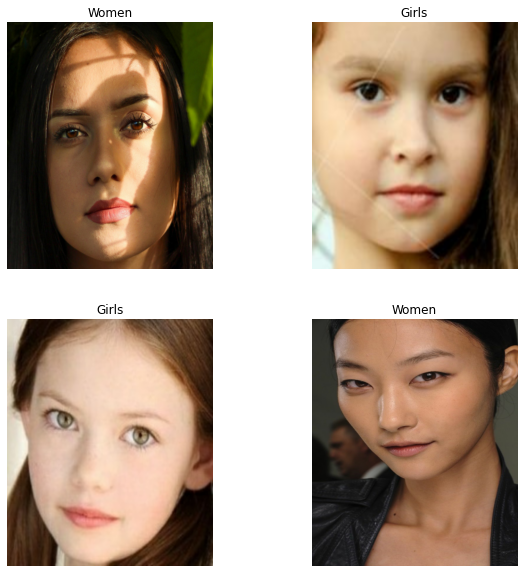

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"));
        plt.title(class_names[labels[i]]);
        plt.axis("off");

#### Create a normalization_layer to scale your image pixels

In [15]:
from tensorflow.keras.layers import Rescaling
    
# < Your code goes here >   

normalization_layer = ?

##### Apply the normalization_layer to both generators using .map() function
##### Apply .prefetch to both of generators with AUTOTUNE-d buffer_size

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

# < Your code goes here > 
train_ds = ?
val_ds = ?

##### Create your Classification CNN with Sequential API
#### Do not forget to specify the input_shape in your first layer

In [17]:
def my_model(num_classes = 4):

    model = tf.keras.Sequential([
    # < Your code goes here > 

    tf.keras.layers.Dense(num_classes)
    ])
    
    tf.keras.backend.clear_session()
    
    model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

    return model

model = my_model()

### Print the summary of the model

In [1]:
model.summary()

##### Fit your model

In [2]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

##### Print the training and val accuracy and loss corves during your training

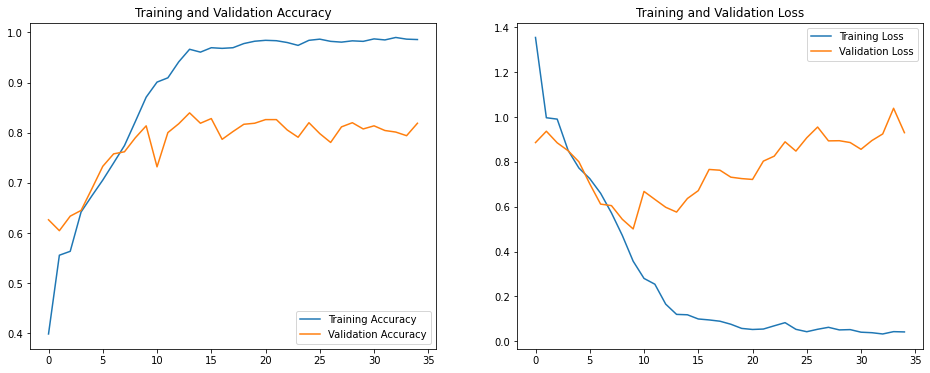

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Save your model with "my_model" name in '.h5' formar: https://www.tensorflow.org/tutorials/keras/save_and_load

In [21]:
!pip install pyyaml h5py

    # < Your code goes here > 


In [3]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

In [23]:
# Evaluate the model
loss, acc = model.evaluate(val_ds,  verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

41/41 - 34s - loss: 0.9299 - accuracy: 0.8188 - 34s/epoch - 819ms/step
Restored model, accuracy: 81.88%
